In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
base = pd.read_csv('../../Data/BaseData.csv')

In [3]:
base.shape

(2580, 299)

In [4]:
MLR = LinearRegression()

In [5]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [6]:
y

array([126000, 139500, 124900, ..., 145000, 217500, 215000])

In [7]:
ylog = np.log(y)
ylog

array([11.74403719, 11.84581988, 11.7352687 , ..., 11.88448902,
       12.28995413, 12.27839331])

In [8]:
np.exp(ylog)

array([126000., 139500., 124900., ..., 145000., 217500., 215000.])

In [9]:
len(y)

2580

In [10]:
X.shape

(2580, 298)

In [11]:
X.shape[1]

298

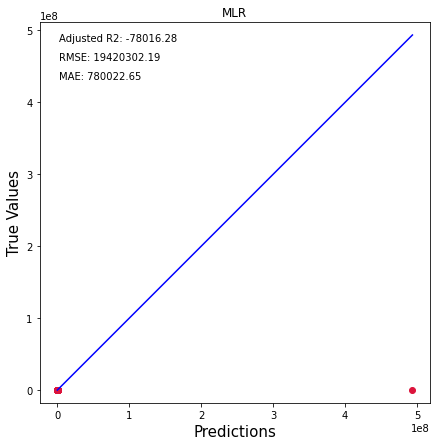

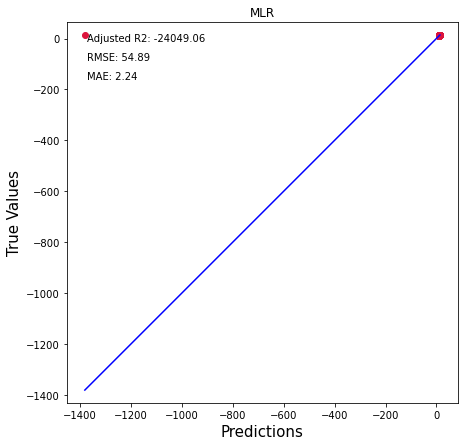

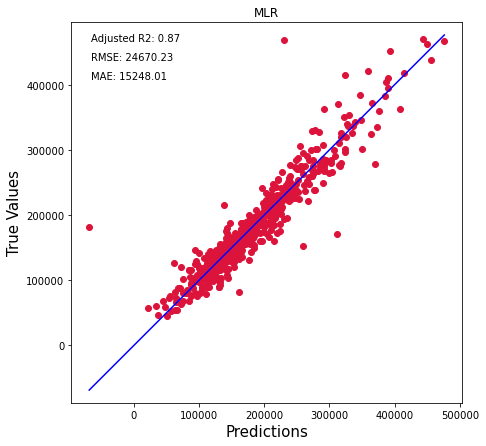

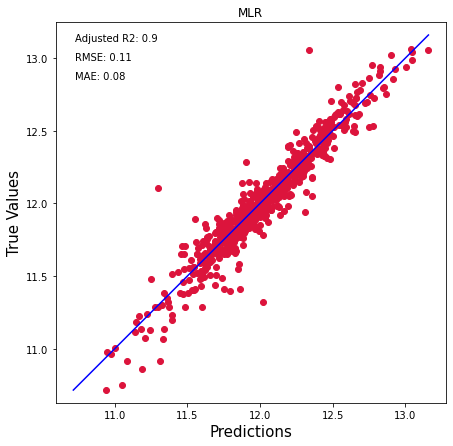

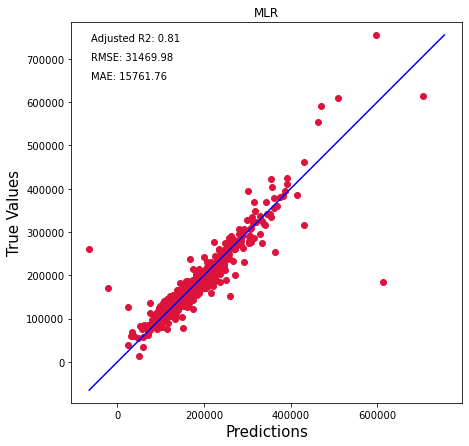

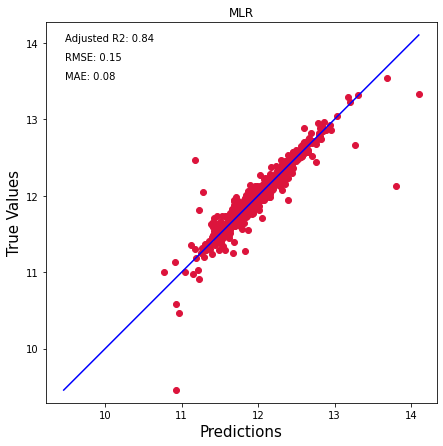

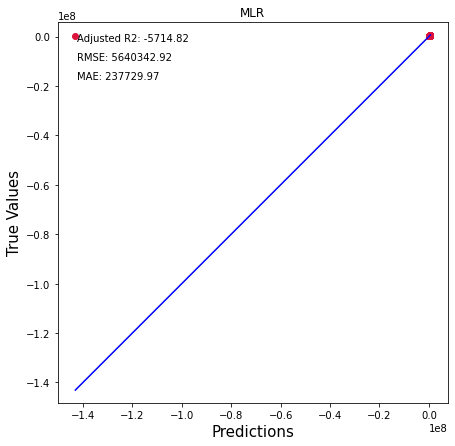

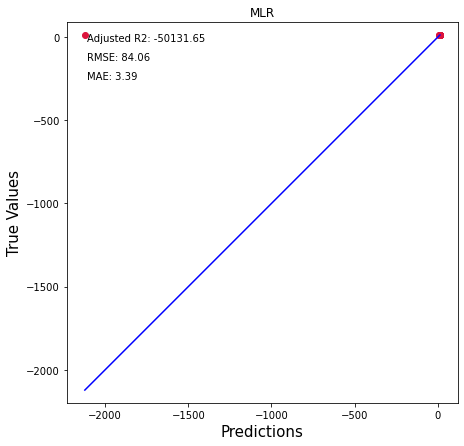

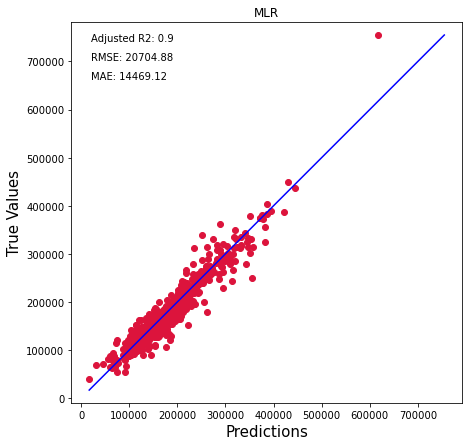

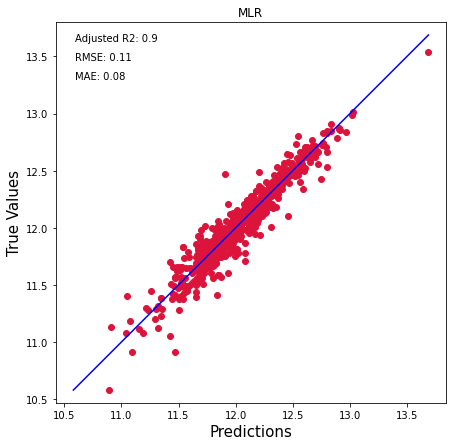

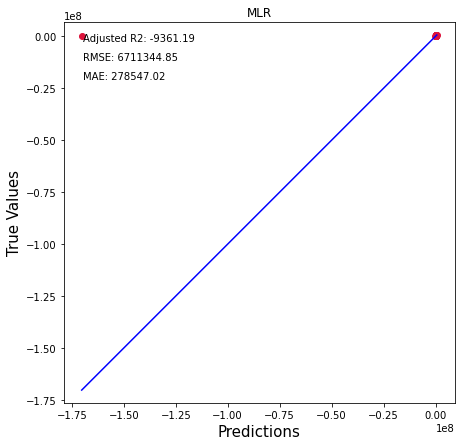

/var/folders/kl/4xt5tydd0xb8yvwkgnx2mnc00000gn/T/ipykernel_4811/1884368865.py:73: RuntimeWarning: overflow encountered in exp
  PredUSD = np.exp(pred_log)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [12]:
Scores = []
AdjR2 = []
MSE = []
RMSE = []
MAE = []

Scores_Log = []
AdjR2_Log = []
MSE_Log = []
RMSE_Log = []
MAE_Log = []
MAE_USD = []


for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    
    MLR.fit(X_train, y_train)
    pred = MLR.predict(X_test)
    Score = r2_score(y_test, pred)
    Scores.append(Score)
    
    Adj_r2 = 1 - (1-r2_score(y_test, pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AdjR2.append(Adj_r2)
    
    mse = mean_squared_error(y_test, pred)
    MSE.append(mse)
    
    rmse = np.sqrt(mse)
    RMSE.append(rmse)
    
    mae = mean_absolute_error(y_test, pred)
    MAE.append(mae)
    
    plt.figure(figsize=(7,7))
    plt.scatter(pred, y_test, c='crimson')

    plt.title('MLR')
    p1 = max(max(pred), max(y_test))
    p2 = min(min(pred), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('Predictions', fontsize=15)
    plt.ylabel('True Values', fontsize=15)
    plt.axis('equal')
    plt.annotate('Adjusted R2: ' + str(round(Adj_r2,2)), xy=(0.05, 0.95), xycoords='axes fraction')
    plt.annotate('RMSE: ' + str(round(rmse,2)), xy=(0.05, 0.90), xycoords='axes fraction')
    plt.annotate('MAE: ' + str(round(mae,2)), xy=(0.05, 0.85), xycoords='axes fraction')
    plt.show()
    
    
    
    y_train_log = np.log(y_train)
    y_test_log = np.log(y_test)
    
    MLR.fit(X_train, y_train_log)
    pred_log = MLR.predict(X_test)
    
    Score = r2_score(y_test_log, pred_log)
    Scores_Log.append(Score)
    
    Adj_r2 = 1 - (1-r2_score(y_test_log, pred_log)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AdjR2_Log.append(Adj_r2)
    
    mse = mean_squared_error(y_test_log, pred_log)
    MSE_Log.append(mse)
    
    rmse = np.sqrt(mse)
    RMSE_Log.append(rmse)
    
    mae = mean_absolute_error(y_test_log, pred_log)
    MAE_Log.append(mae)
    
    PredUSD = np.exp(pred_log)
    maeUSD = mean_absolute_error(y_test, PredUSD)
    MAE_USD.append(maeUSD)
    
    plt.figure(figsize=(7,7))
    plt.scatter(pred_log, y_test_log, c='crimson')

    plt.title('MLR')
    p1 = max(max(pred_log), max(y_test_log))
    p2 = min(min(pred_log), min(y_test_log))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('Predictions', fontsize=15)
    plt.ylabel('True Values', fontsize=15)
    plt.axis('equal')
    plt.annotate('Adjusted R2: ' + str(round(Adj_r2,2)), xy=(0.05, 0.95), xycoords='axes fraction')
    plt.annotate('RMSE: ' + str(round(rmse,2)), xy=(0.05, 0.90), xycoords='axes fraction')
    plt.annotate('MAE: ' + str(round(mae,2)), xy=(0.05, 0.85), xycoords='axes fraction')
    plt.show()
    
    
    
    

In [ ]:
combo = pd.DataFrame({'R_Squared': Scores, 'Adjusted_R2': AdjR2, 'Mean Squared Error': MSE,
                      'Root MSE': RMSE, 'Mean Absolute Error': MAE})

In [ ]:
combo

In [ ]:
combo_log = pd.DataFrame({'R_Squared_Log': Scores_Log, 'Adjusted_R2_Log': AdjR2_Log, 
                          'Mean Squared Error Log': MSE_Log,
                          'Root MSE Log': RMSE_Log, 'MAE Log': MAE_Log,
                          'MAE USD': MAE_USD})

In [ ]:
MAE_Log

In [ ]:
PosR2 = combo[combo.R_Squared > 0]
print(len(PosR2))
PosR2.head(10)

In [ ]:
PosR2_Log = combo_log[combo_log.R_Squared_Log > 0]
print(len(PosR2_Log))
PosR2_Log.head(10)

In [ ]:
box = pd.concat([PosR2['Adjusted_R2'], PosR2_Log['Adjusted_R2_Log']], axis=1)

In [ ]:
plt.figure(figsize=(10,10))
plt.title('100 Simulations With Random Train-Test (75/25) Splits', fontsize=20)
plt.ylabel('Range of Adjusted R-Squared on Test Set', fontsize=17)
plt.xlabel('Log Y or No Log?', fontsize=17)
sns.boxplot(data=box)
plt.xticks(rotation=25);

In [ ]:
box.describe()

In [ ]:
sns.scatterplot(data=combo, x='Mean Squared Error', y='Adjusted_R2'); 

In [ ]:
sns.scatterplot(data=combo, x='Root MSE', y='Adjusted_R2'); 

In [ ]:
sns.scatterplot(data=combo, x='Mean Absolute Error', y='Adjusted_R2'); 

In [ ]:
plt.figure(figsize=(10,10))
plt.title('RMSE vs MAE, 100xMLR (75/25 splits)', fontsize=20)
plt.ylabel('Range of RMSE and MAE', fontsize=17)
plt.xlabel('RMSE and MAE', fontsize=17)
sns.boxplot(data=combo[['Root MSE', 'Mean Absolute Error']])
plt.xticks(rotation=25);

In [ ]:
NegR2 = combo[combo.R_Squared < 0]
print(len(NegR2))
NegR2

In [ ]:
NegR2.describe()

In [ ]:
PosR2 = combo[combo.R_Squared > 0]
print(len(PosR2))
PosR2.head(10)

In [ ]:
PosR2.to_csv('MLR.csv', index=False)

In [ ]:
PosR2.describe()

In [ ]:
sns.scatterplot(data=PosR2, x='Mean Squared Error', y='Adjusted_R2'); 

In [ ]:
sns.scatterplot(data=PosR2, x='Root MSE', y='Adjusted_R2'); 

In [ ]:
sns.scatterplot(data=PosR2, x='Mean Absolute Error', y='Adjusted_R2'); 

In [ ]:
boxdata = PosR2[['R_Squared', 'Adjusted_R2']]

In [ ]:
boxdata.shape

In [ ]:
plt.figure(figsize=(10,10))
plt.title('R-Squared vs Adjusted R-Squared, 100xMLR (75/25 splits)', fontsize=20)
plt.ylabel('Range of AdjustedR2 & R-Squared on Test Set', fontsize=17)
plt.xlabel('R2 & Adjusted R2', fontsize=17)
sns.boxplot(data=boxdata)
plt.xticks(rotation=25);

In [ ]:
boxdata.describe()

In [ ]:
boxdata2 = PosR2[['Root MSE', 'Mean Absolute Error']]

In [ ]:
plt.figure(figsize=(10,10))
plt.title('RMSE vs MAE, 100xMLR (75/25 splits)', fontsize=20)
plt.ylabel('Range of RMSE and MAE', fontsize=17)
plt.xlabel('RMSE and MAE', fontsize=17)
sns.boxplot(data=boxdata2)
plt.xticks(rotation=25);

In [ ]:
boxdata2.describe()